https://github.com/Rrtk2

-> private + allow Rick and Rachel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

In [2]:
df = pd.read_csv("dataset\CSF_Proteomics_ADNI.csv")
df['binary_class'].replace({'stable':0,'decliner':1},inplace=True)
df['three_class'].replace({'slowDecline':0,'rapidDecline':1,'stable':2},inplace=True)

pheno = df.loc[:,'RID':'VISCODE']
data = df.loc[:,'A1AT.AVLTIDEK':'VTDB.VPTADLEDVLPLAEDITNILSK']

df.head()

,RID,binary_class,DX.bl,three_class,X,ORIGPROT,VISCODE,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,...,UBB.TLSDYNIQK,VASN.NLHDLDVSDNQLER,VASN.SLTLGIEPVSPTSLR,VASN.YLQGSSVQLR,VGF.AYQGVAAPFPK,VGF.NSEPQDEGELFQGVDPR,VGF.THLGEALAPLSK,VTDB.EFSHLGK,VTDB.HLSLLTTLSNR,VTDB.VPTADLEDVLPLAEDITNILSK
1,4,0,LMCI,0,2,ADNI1,bl,10.949712,7.708165,9.573963,...,22.433346,14.520762,11.920567,15.559591,17.137239,19.180601,15.879692,9.330754,19.078267,15.533694
2,33,1,LMCI,0,13,ADNI1,bl,10.764089,8.144418,9.561409,...,22.990240,15.042258,12.564332,16.162647,17.335445,19.107135,16.358891,9.619933,19.969954,15.963824
4,41,1,LMCI,1,16,ADNI1,bl,10.650946,8.176241,9.504176,...,22.214944,14.147466,11.879596,15.314367,16.923098,18.688839,15.961955,9.665518,19.457515,15.475607
5,42,1,LMCI,0,17,ADNI1,bl,10.197844,7.629740,9.583185,...,22.574874,14.818850,12.438868,15.894137,17.009460,18.724949,16.161613,10.017388,20.511504,16.278260
6,45,1,LMCI,1,18,ADNI1,bl,11.695952,7.426978,10.114171,...,23.040696,15.596177,13.224841,16.490632,18.269607,20.088496,17.197825,8.737022,19.649728,15.543085


C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

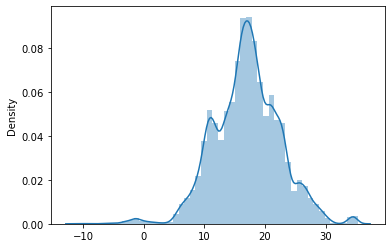

In [3]:
sns.distplot(data)

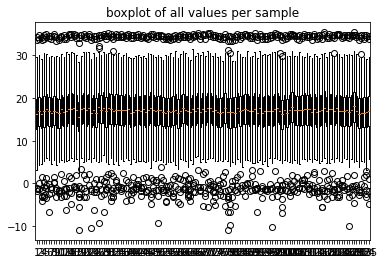

In [4]:
plt.boxplot(data.transpose())
plt.title('boxplot of all values per sample')
plt.show()

***Normalization***

C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


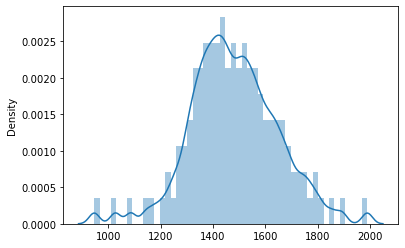

In [3]:
from scipy import stats

#QUANTILE NORMALIZATION
def quantile_normalize(df):
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0), 
                             index=df.index, 
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return df_qn


# compute quantile normalized data
df_qn=quantile_normalize(data)
data = df_qn

#compute box-cox transformation
df_bc = pd.DataFrame().reindex_like(df_qn)

for col in df_qn:
    df_bc[col],_ = stats.boxcox(df_qn[col])
sns.distplot(df_bc)
data = df_qn



Families of methods (use baysen, nn approach -> look intro trees, baysan, ann, a regression method)

Split dataset in 80% train and 20% test data initially start with 80-20, try to estimate the power of split (80-20, drop samples in 80% and estimate the power)

In [6]:
data.describe()

,A1AT.AVLTIDEK,A1AT.LSITGTYDLK,A1AT.SVLGQLGITK,A1BG.NGVAQEPVHLDSPAIK,A1BG.SGLSTGWTQLSK,A2GL.DLLLPQPDLR,A2GL.VAAGAFQGLR,A4.LVFFAEDVGSNK,A4.THPHFVIPYR,A4.WYFDVTEGK,...,UBB.TLSDYNIQK,VASN.NLHDLDVSDNQLER,VASN.SLTLGIEPVSPTSLR,VASN.YLQGSSVQLR,VGF.AYQGVAAPFPK,VGF.NSEPQDEGELFQGVDPR,VGF.THLGEALAPLSK,VTDB.EFSHLGK,VTDB.HLSLLTTLSNR,VTDB.VPTADLEDVLPLAEDITNILSK
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,...,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610,17.050610
std,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,...,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548,0.669548
min,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,...,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200,14.674200
25%,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,...,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337,16.643337
50%,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,...,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345,17.038345
75%,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,...,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953,17.475953
max,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,...,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735,18.872735


**split cleaned dataset**

In [4]:
from sklearn.model_selection import train_test_split

data['binary_class'] = df['binary_class']
data['three_class'] = df['three_class']
X = data.drop(columns = ['binary_class','three_class'])
y = data["binary_class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 97)

Try with stratified data
-> github

***SVM classifier***

In [20]:
# import support vector classifier 
# "Support Vector Classifier"
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report

clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 
y_predicted = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.75      0.94      0.83        16

    accuracy                           0.78        27
   macro avg       0.80      0.74      0.75        27
weighted avg       0.79      0.78      0.77        27



***Single Random Forest classifier***

In [24]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier().fit(X_train,y_train)
y_predicted = model.predict(X_test)
# report performance
print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.67      0.88      0.76        16

    accuracy                           0.67        27
   macro avg       0.67      0.62      0.61        27
weighted avg       0.67      0.67      0.64        27



**Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predicted = model.predict(X_test)
# report performance
print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.78      0.88      0.82        16

    accuracy                           0.78        27
   macro avg       0.78      0.76      0.76        27
weighted avg       0.78      0.78      0.77        27



**Recursive Feature Elimination (RFE)**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.feature_selection import RFECV

xgb.set_config(verbosity=0)

classifier = xgb.XGBClassifier(use_label_encoder =False)
rfecv = RFECV(
    estimator=classifier,
    min_features_to_select=1,
    step=3,
    n_jobs=-1,
    scoring="r2",
    cv=5,
)
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=XGBClassifier(base_score=None, booster=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, enable_categorical=False,
                              gamma=None, gpu_id=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              use_label_encoder=False, validate_parameters=None,
                              verbosity=Non

We kept 35 features out of the 86


C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marti\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(m

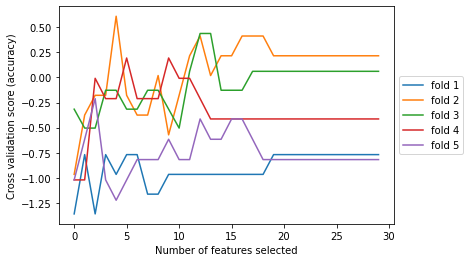

In [8]:
#keep selected features
newX_train = X_train[X_train.columns[rfecv.support_]]
newX_test = X_test[X_test.columns[rfecv.support_]]

print('We kept',newX_train.shape[1],'features out of the',X_train.shape[1])
min_features_to_select = 1

plt.figure()
lines = []
for i in range(rfecv.grid_scores_.shape[1]):
    lines.append(plt.plot(rfecv.grid_scores_[:,i]))

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.legend(lines,labels = ['fold 1', 'fold 2', 'fold 3','fold 4', 'fold 5'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

X_train = newX_train
X_test = newX_test

In [9]:
from sklearn.metrics import accuracy_score, classification_report

clf = xgb.XGBClassifier(learning_rate = 0.39, n_estimators = 54, max_depth = 4, min_child_weight = 2.82, gamma = 5.41, subsample = 1, seed = 24,eval_metric='mlogloss',use_label_encoder =False)
clf.fit(newX_train, y_train)
y_predicted = clf.predict(newX_test)

print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy: 0.6296296296296297
              precision    recall  f1-score   support

           0       0.60      0.27      0.37        11
           1       0.64      0.88      0.74        16

    accuracy                           0.63        27
   macro avg       0.62      0.57      0.56        27
weighted avg       0.62      0.63      0.59        27



In [13]:
from sklearn.feature_selection import RFE
import xgboost as xgb
xgb.set_config(verbosity=0)

classifier = xgb.XGBClassifier(learning_rate = 0.71, n_estimators = 205, max_depth = 5, min_child_weight = 2.34, gamma = 7.11, subsample = 0.38, colsample_bytree = 0.47, seed = 24,eval_metric='mlogloss',use_label_encoder =False)
n_features_to_select = 100
rfe = RFE(classifier, n_features_to_select=n_features_to_select,step=5)
rfe.fit(X_train, y_train)

X_train.columns[rfe.support_]

Index(['APLP2.WYFDLSK', 'CATD.YSQAVPAVTEGPIPEVLK',
       'CMGA.SGEATDGARPQALPEPMQESK', 'CSTN3.ATGEGLIR', 'FABPH.SIVTLDGGK',
       'NCAM2.IIELSQTTAK', 'NGF.SAPAAAIAAR', 'NPTX2.LESLEHQLR',
       'NPTXR.LVEAFGGATK', 'PCSK1.GEAAGAVQELAR'],
      dtype='object')

***Clustering model trials***

In [14]:
#Gradient Boosting and XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

xgb.set_config(verbosity=0)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, model.predict(X_test)))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        11
           1       0.70      0.88      0.78        16

    accuracy                           0.70        27
   macro avg       0.71      0.66      0.67        27
weighted avg       0.71      0.70      0.69        27



C:\Users\marti\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [10]:
#Hyperparameter tuning XGBoost through Evolutionary Computation

import numpy as np
import random

random.seed(723)
np.random.seed(723)

def initilialize_poplulation(numberOfParents):
    learningRate = np.empty([numberOfParents, 1])
    nEstimators = np.empty([numberOfParents, 1], dtype = np.uint8)
    maxDepth = np.empty([numberOfParents, 1], dtype = np.uint8)
    minChildWeight = np.empty([numberOfParents, 1])
    gammaValue = np.empty([numberOfParents, 1])
    subSample = np.empty([numberOfParents, 1])
    colSampleByTree =  np.empty([numberOfParents, 1])

    for i in range(numberOfParents):
        learningRate[i] = round(random.uniform(0.01, 1), 2)
        nEstimators[i] = random.randrange(10, 1500, step = 25)
        maxDepth[i] = int(random.randrange(1, 10, step= 1))
        minChildWeight[i] = round(random.uniform(0.01, 10.0), 2)
        gammaValue[i] = round(random.uniform(0.01, 10.0), 2)
        subSample[i] = round(random.uniform(0.01, 1.0), 2)
        colSampleByTree[i] = round(random.uniform(0.01, 1.0), 2)
    
    population = np.concatenate((learningRate, nEstimators, maxDepth, minChildWeight, gammaValue, subSample, colSampleByTree), axis= 1)
    return population

   

def fitness_accuracy_score(y_true, y_pred):
    fitness = round((accuracy_score(y_true, y_pred)), 4)
    return fitness

def train_population(population, dMatrixTrain, dMatrixtest, y_test):
    aScore = []
    for i in range(population.shape[0]):
        param = { 'objective':'binary:logistic',
              'learning_rate': population[i][0],
              'n_estimators': population[i][1], 
              'max_depth': int(population[i][2]), 
              'min_child_weight': population[i][3],
              'gamma': population[i][4], 
              'subsample': population[i][5],
              'colsample_bytree': population[i][6],
              'seed': 24}
        num_round = 100
        xgbT = xgb.train(param, dMatrixTrain, num_round)
        preds = xgbT.predict(dMatrixtest)
        preds = preds>0.5
        aScore.append(fitness_accuracy_score(y_test, preds))
    return aScore



def new_parents_selection(population, fitness, numParents):
    selectedParents = np.empty((numParents, population.shape[1])) 
    
    for parentId in range(numParents):
        bestFitnessId = np.where(fitness == np.max(fitness))
        bestFitnessId  = bestFitnessId[0][0]
        selectedParents[parentId, :] = population[bestFitnessId, :]
        fitness[bestFitnessId] = -1 
    return selectedParents
        

def crossover_uniform(parents, childrenSize):
    
    crossoverPointIndex = np.arange(0, np.uint8(childrenSize[1]), 1, dtype= np.uint8)
    crossoverPointIndex1 = np.random.randint(0, np.uint8(childrenSize[1]), np.uint8(childrenSize[1]/2)) 
    crossoverPointIndex2 = np.array(list(set(crossoverPointIndex) - set(crossoverPointIndex1))) 
    
    children = np.empty(childrenSize)
    
    
    for i in range(childrenSize[0]):
        
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        children[i, crossoverPointIndex1] = parents[parent1_index, crossoverPointIndex1]
        children[i, crossoverPointIndex2] = parents[parent2_index, crossoverPointIndex2]
    return children
    


def mutation(crossover, numberOfParameters):

    minMaxValue = np.zeros((numberOfParameters, 2))
    
    minMaxValue[0:] = [0.01, 1.0] 
    minMaxValue[1, :] = [10, 2000] 
    minMaxValue[2, :] = [1, 15] 
    minMaxValue[3, :] = [0, 10.0] 
    minMaxValue[4, :] = [0.01, 10.0] 
    minMaxValue[5, :] = [0.01, 1.0] 
    minMaxValue[6, :] = [0.01, 1.0] 
 
    
    mutationValue = 0
    parameterSelect = np.random.randint(0, 7, 1)
    print(parameterSelect)
    if parameterSelect == 0: 
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 1: 
        mutationValue = np.random.randint(-200, 200, 1)
    if parameterSelect == 2:
        mutationValue = np.random.randint(-5, 5, 1)
    if parameterSelect == 3: 
        mutationValue = round(np.random.uniform(5, 5), 2)
    if parameterSelect == 4: 
        mutationValue = round(np.random.uniform(-2, 2), 2)
    if parameterSelect == 5: 
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
    if parameterSelect == 6: 
        mutationValue = round(np.random.uniform(-0.5, 0.5), 2)
  
    
    for idx in range(crossover.shape[0]):
        crossover[idx, parameterSelect] = crossover[idx, parameterSelect] + mutationValue
        if(crossover[idx, parameterSelect] > minMaxValue[parameterSelect, 1]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 1]
        if(crossover[idx, parameterSelect] < minMaxValue[parameterSelect, 0]):
            crossover[idx, parameterSelect] = minMaxValue[parameterSelect, 0]    
    return crossover

In [11]:
xgDMatrix = xgb.DMatrix(X_train, y_train) 
xgbDMatrixTest = xgb.DMatrix(X_test, y_test)

numberOfParents = 100 
numberOfParentsMating = int(numberOfParents/2)
numberOfParameters = 7 
numberOfGenerations = 50

populationSize = (numberOfParents, numberOfParameters)
population = initilialize_poplulation(numberOfParents)

fitnessHistory = np.empty([numberOfGenerations+1, numberOfParents])
populationHistory = np.empty([(numberOfGenerations+1)*numberOfParents, numberOfParameters])
populationHistory[0:numberOfParents, :] = population

for generation in range(numberOfGenerations):
    print("This is number %s generation" % (generation))
    
    fitnessValue = train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
    fitnessHistory[generation, :] = fitnessValue
    
    print('Best Accuracy score in the this iteration = {}'.format(np.max(fitnessHistory[generation, :])))

    parents = new_parents_selection(population=population, fitness=fitnessValue, numParents=numberOfParentsMating)
    children = crossover_uniform(parents=parents, childrenSize=(populationSize[0] - parents.shape[0], numberOfParameters))
    children_mutated = mutation(children, numberOfParameters)

    population[0:parents.shape[0], :] = parents 
    population[parents.shape[0]:, :] = children_mutated 
    
    populationHistory[(generation+1)*numberOfParents : (generation+1)*numberOfParents+ numberOfParents , :] = population 
    
fitness = train_population(population=population, dMatrixTrain=xgDMatrix, dMatrixtest=xgbDMatrixTest, y_test=y_test)
fitnessHistory[generation+1, :] = fitness

bestFitnessIndex = np.where(fitness == np.max(fitness))[0][0]

print("Best fitness is =", fitness[bestFitnessIndex])


print("Best parameters are:")
print('learning_rate', population[bestFitnessIndex][0])
print('n_estimators', population[bestFitnessIndex][1])
print('max_depth', int(population[bestFitnessIndex][2])) 
print('min_child_weight', population[bestFitnessIndex][3])
print('gamma', population[bestFitnessIndex][4])
print('subsample', population[bestFitnessIndex][5])
print('colsample_bytree', population[bestFitnessIndex][6])

This is number 0 generation
Best Accuracy score in the this iteration = 0.8148
[2]
This is number 1 generation
Best Accuracy score in the this iteration = 0.8148
[2]
This is number 2 generation
Best Accuracy score in the this iteration = 0.8148
[1]
This is number 3 generation
Best Accuracy score in the this iteration = 0.8148
[2]
This is number 4 generation
Best Accuracy score in the this iteration = 0.8148
[4]
This is number 5 generation
Best Accuracy score in the this iteration = 0.8148
[1]
This is number 6 generation
Best Accuracy score in the this iteration = 0.8148
[2]
This is number 7 generation
Best Accuracy score in the this iteration = 0.8148
[4]
This is number 8 generation
Best Accuracy score in the this iteration = 0.8148
[1]
This is number 9 generation
Best Accuracy score in the this iteration = 0.8148
[3]
This is number 10 generation
Best Accuracy score in the this iteration = 0.8148
[0]
This is number 11 generation
Best Accuracy score in the this iteration = 0.8148
[0]
Th

In [12]:
#Optimizing Model

clf = xgb.XGBClassifier(learning_rate = 0.61, n_estimators = 29, max_depth = 5, min_child_weight = 1.27, gamma = 1.78, subsample = 0.49, colsample_bytree = 0.49, seed = 24,eval_metric='mlogloss',use_label_encoder =False)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.78      0.88      0.82        16

    accuracy                           0.78        27
   macro avg       0.78      0.76      0.76        27
weighted avg       0.78      0.78      0.77        27



In [ ]:
#Feature Importance through Shapley Additive Explanations
import shap

explainer = shap.Explainer(clf)
shap_values = explainer(X)
print(shap_values)
shap.plots.bar(shap_values)
plt.show()